In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
path = "/content/drive/MyDrive/Black Chess Moves Analysis/twic_master.csv"
df = pd.read_csv(path)

<ipython-input-3-376df9a740e9>:2: DtypeWarning: Columns (10,13,14,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971319 entries, 0 to 1971318
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   twic_number     int64  
 1   White           object 
 2   Black           object 
 3   Date            object 
 4   EventDate       object 
 5   Event           object 
 6   Result          object 
 7   mainline_moves  object 
 8   Site            object 
 9   Online          bool   
 10  Round           object 
 11  ECO             object 
 12  Opening         object 
 13  WhiteFideId     object 
 14  BlackFideId     object 
 15  WhiteElo        float64
 16  BlackElo        float64
 17  Variation       object 
 18  WhiteTitle      object 
 19  BlackTitle      object 
 20  WhiteTeam       object 
 21  BlackTeam       object 
 22  EventType       object 
 23  FEN             object 
 24  SetUp           float64
 25  Variant         object 
 26  Board           float64
 27  PlyCount        float64
 28  EventCategor

In [5]:
df.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476.0,1503014.0,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192.0,4611500.0,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045.0,24101605.0,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737.0,4115341.0,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507.0,13300474.0,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['AvgElo'] = df[['WhiteElo','BlackElo']].mean(axis=1)
df['RatingDifference'] = abs(df['WhiteElo'] - df['BlackElo'])
df['BlackWins'] = df['Result'] == '0-1'

df[['WhiteElo','BlackElo','AvgElo','RatingDifference','Result','BlackWins']].head()

,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,BlackWins
0,2527.0,2835.0,2681.0,308.0,1-0,False
1,2746.0,2483.0,2614.5,263.0,1-0,False
2,2620.0,2709.0,2664.5,89.0,0-1,True
3,2719.0,2592.0,2655.5,127.0,1/2-1/2,False
4,2637.0,2765.0,2701.0,128.0,1-0,False


In [7]:
important_cols = ['White','Black','WhiteElo','BlackElo','AvgElo','RatingDifference','Result','Online','Opening','ECO','mainline_moves']
df[important_cols].sort_values('AvgElo',ascending=False).head()

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
1662955,"Claesen,P","Decoster,F",2327.0,204269.0,103298.0,201942.0,1/2-1/2,False,Sicilian defence,B20,1. e4 c5 2. c4 Nc6 3. Nc3 e6 4. g3 g6 5. Bg2 B...
340906,AllieStein v0.5_timefix-n14.0,LCZero v0.24-sv-t60-3010,3936.0,3958.0,3947.0,22.0,1/2-1/2,True,Sicilian,B90,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
1622686,LCZero v0.24-sv-t60-3010,Stockfish 202003092246,3958.0,3936.0,3947.0,22.0,1/2-1/2,True,Alekhine's defence,B03,1. e4 Nf6 2. e5 Nd5 3. d4 d6 4. c4 Nb6 5. f4 B...
1424585,LCZero v0.24-sv-t60-3010,Stockfish 202003092246,3958.0,3936.0,3947.0,22.0,1/2-1/2,True,Philidor,C41,1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. Nf3 Nbd7 5. Bc...
1622716,Stockfish 202003092246,LCZero v0.24-sv-t60-3010,3936.0,3958.0,3947.0,22.0,1/2-1/2,True,Philidor,C41,1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. Nf3 Nbd7 5. Bc...


In [8]:
# Remove the outlier
df = df.drop(df[df['BlackElo'] == 204269.0].index)

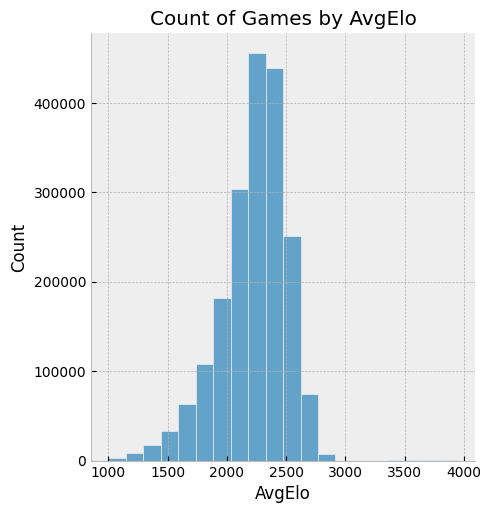

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

ax = sns.displot(df, x='AvgElo', bins=20, color=next(color_cycle)).set(title='Count of Games by AvgElo')
plt.show()

Many games have a high average rating (>2000) between the two players. But the average Elo is only part of the story. Are there games where one side is the heavy favorite?

In [10]:
df[important_cols].query("RatingDifference > 500").head()

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
92,"Indjic,A","Masrahi,Abdulrahman A",2620.0,1903.0,2261.5,717.0,1-0,False,Scotch game,C45,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Bc5 5. ...
93,"Al Thebaiti,Ahmed M","Yuffa,D",1976.0,2572.0,2274.0,596.0,0-1,False,Queen's pawn game,A45,1. d4 Nf6 2. Bf4 g6 3. e3 Bg7 4. Nc3 d6 5. h4 ...
94,"Zvjaginsev,V","khayat,Abdullah F",2642.0,1723.0,2182.5,919.0,1-0,False,Reti,A05,1. Nf3 Nf6 2. g3 g6 3. Bg2 Bg7 4. O-O O-O 5. d...
95,"Ahmed,Hassan Abdillahi","Huzman,A",1570.0,2580.0,2075.0,1010.0,0-1,False,Gruenfeld,D94,1. d4 Nf6 2. c4 g6 3. Nf3 Bg7 4. Nc3 d5 5. e3 ...
96,"Predke,A","Al Turky,Fahad A",2622.0,1836.0,2229.0,786.0,1-0,False,French,C02,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Nf3 Qb...


Since the goal is to find viable openings where black sees good results, it is worth noting that results against players much lower rated than the opponent might not be representative of good opening choices. Let's filter to look at only the games where players are within 200 points of each other. This means there is a smaller chance that a much stronger player can choose a "creative" opening and get away with it. We will also look at high-rated games.

In [11]:
df.query("AvgElo > 2000 and RatingDifference < 200")[important_cols].head()

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
2,"Tari,A","Artemiev,V",2620.0,2709.0,2664.5,89.0,0-1,False,Sicilian,B52,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...
3,"Fedoseev,Vl3","Tregubov,P",2719.0,2592.0,2655.5,127.0,1/2-1/2,False,Petrov's defence,C42,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...
4,"Hovhannisyan,R","Aronian,L",2637.0,2765.0,2701.0,128.0,1-0,False,Robatsch defence,B06,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...
7,"Karjakin,Sergey","Yilmaz,M",2753.0,2636.0,2694.5,117.0,1-0,False,Sicilian,B90,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
8,"Goganov,A","Nepomniachtchi,I",2612.0,2763.0,2687.5,151.0,0-1,False,Gruenfeld,D85,1. d4 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. e...


In [12]:
# Filtering by Opening and ECO, and finding the total count of games that black wins. We separate online from live chess to understand the characteristics of each

op_live = df.query("AvgElo > 2000 and RatingDifference < 200 and Online == False").groupby(['Opening','ECO']).agg({'Result':'count', 'BlackWins': 'sum'}).reset_index()
op_online = df.query("AvgElo > 2000 and RatingDifference < 200 and Online == True").groupby(['Opening','ECO']).agg({'Result':'count', 'BlackWins': 'sum'}).reset_index()

op = df.query("AvgElo > 2000 and RatingDifference < 200").groupby(['Opening','ECO']).agg({'Result':'count', 'BlackWins': 'sum'}).reset_index()

In [13]:
op_live.sample(5)

,Opening,ECO,Result,BlackWins
149,English,A14,3231,634
516,Queen's Indian,E12,3079,775
129,Dutch defence,A90,724,172
513,Queen's Gambit Declined: Barmen Variation,D37,1,0
310,King's Indian,E87,110,38


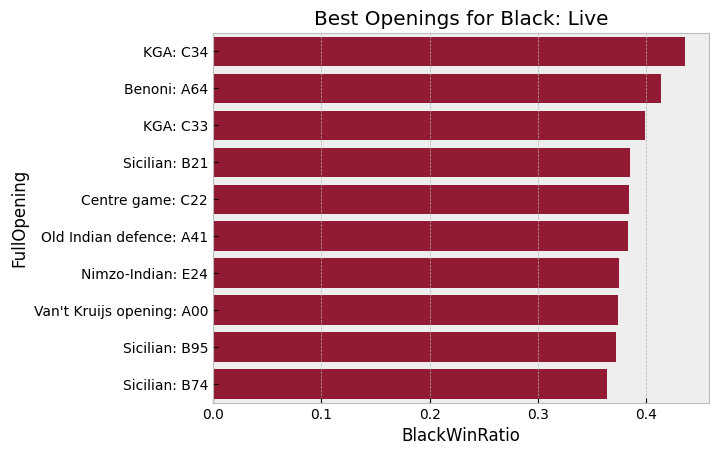

,FullOpening,Result,BlackWins,BlackWinRatio
269,KGA: C34,156,68,0.436
21,Benoni: A64,399,165,0.414
268,KGA: C33,203,81,0.399
634,Sicilian: B21,1326,511,0.385
96,Centre game: C22,250,96,0.384
416,Old Indian defence: A41,1137,435,0.383
367,Nimzo-Indian: E24,256,96,0.375
752,Van't Kruijs opening: A00,305,114,0.374
707,Sicilian: B95,301,112,0.372
686,Sicilian: B74,187,68,0.364


In [14]:
op_live['BlackWinRatio'] = np.round(op_live['BlackWins'] / op_live['Result'], 3)
op_live = op_live[op_live['Result'] > 100].sort_values(by = 'BlackWinRatio',ascending=False).head(10)
op_live['FullOpening'] = op_live['Opening'] + ': ' + op_live['ECO']
#op_live
ax1 = sns.barplot(data=op_live, x='BlackWinRatio', y='FullOpening', orient = 'h',color=next(color_cycle)).set(title='Best Openings for Black: Live')
plt.show()
op_live[['FullOpening','Result','BlackWins','BlackWinRatio']]

The best openings for black in live chess are well-known and potentially very sharp. A couple at the top of this list show black winning at a 0.4 rate, which is impressive since draws are not counted.

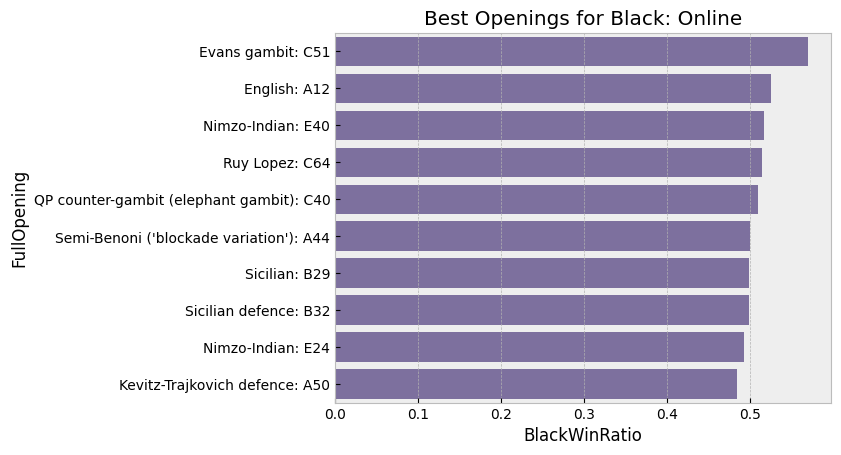

,FullOpening,Result,BlackWins,BlackWinRatio
179,Evans gambit: C51,102,58,0.569
139,English: A12,217,114,0.525
368,Nimzo-Indian: E40,145,75,0.517
556,Ruy Lopez: C64,144,74,0.514
493,QP counter-gambit (elephant gambit): C40,330,168,0.509
607,Semi-Benoni ('blockade variation'): A44,144,72,0.500
617,Sicilian: B29,581,290,0.499
690,Sicilian defence: B32,273,136,0.498
352,Nimzo-Indian: E24,120,59,0.492
267,Kevitz-Trajkovich defence: A50,370,179,0.484


In [15]:
op_online['BlackWinRatio'] = np.round(op_online['BlackWins'] / op_online['Result'], 3)
op_online = op_online[op_online['Result'] > 100].sort_values(by = 'BlackWinRatio',ascending=False).head(10)
op_online['FullOpening'] = op_online['Opening'] + ': ' + op_online['ECO']
#op_online
ax = sns.barplot(data=op_online, x='BlackWinRatio', y='FullOpening', orient = 'h',color=next(color_cycle)).set(title='Best Openings for Black: Online')
plt.show()
op_online[['FullOpening','Result','BlackWins','BlackWinRatio']]

The top openings on this online-only list all have a win rate of higher than 0.5! Some of these openings fall more in the novelty category: something less serious that you would use to catch someone off-guard.

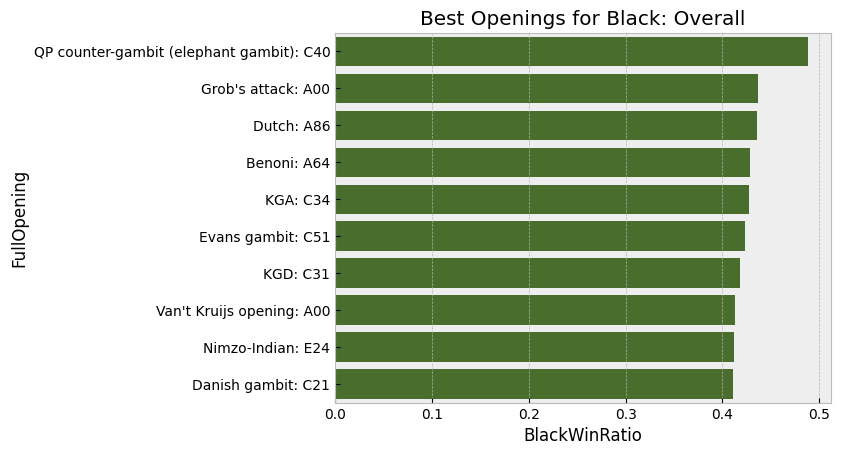

,FullOpening,Result,BlackWins,BlackWinRatio
522,QP counter-gambit (elephant gambit): C40,369,180,0.488
245,Grob's attack: A00,439,192,0.437
117,Dutch: A86,101,44,0.436
22,Benoni: A64,499,214,0.429
279,KGA: C34,229,98,0.428
195,Evans gambit: C51,336,142,0.423
286,KGD: C31,153,64,0.418
763,Van't Kruijs opening: A00,637,263,0.413
378,Nimzo-Indian: E24,376,155,0.412
105,Danish gambit: C21,112,46,0.411


In [16]:
op['BlackWinRatio'] = np.round(op['BlackWins'] / op['Result'], 3)
op = op[op['Result'] > 100].sort_values(by = 'BlackWinRatio',ascending=False).head(10)
op['FullOpening'] = op['Opening'] + ': ' + op['ECO']
#op
ax = sns.barplot(data=op, x='BlackWinRatio', y='FullOpening', orient = 'h', color=next(color_cycle)).set(title='Best Openings for Black: Overall')
plt.show()
op[['FullOpening','Result','BlackWins','BlackWinRatio']]

The overall list shows a mixture of solid openings like the Dutch and Benoni, combined with some more creative options. The Grob (1. g4) is notoriously bad for white so it makes sense that Black has an easy time dealing with it.

In [17]:
df.query("Opening == 'QP counter-gambit (elephant gambit)' and Result == '0-1'")[important_cols].sort_values('AvgElo',ascending=False).head(10)

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
1230761,"Liang,Awonder","Nihal,Sarin",2613.0,2648.0,2630.5,35.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. Nc3 dxe4 4. Nxe5 Bd6 5. ...
1765811,"Abasov,N","Gadimbayli,Abdulla",2664.0,2470.0,2567.0,194.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. exd5 e4 4. Qe2 Nf6 5. Nc...
61197,"Swiercz,D","Gadimbayli,Abdulla",2649.0,2470.0,2559.5,179.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. d4 dxe4 4. Nxe5 Bd6 5. N...
309013,"Paravyan,D","Gadimbayli,Abdulla",2647.0,2470.0,2558.5,177.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. Nxe5 Bd6 4. d4 dxe4 5. N...
309026,"Ter Sahakyan,S","Gadimbayli,Abdulla",2640.0,2470.0,2555.0,170.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. d4 dxe4 4. Nxe5 Bd6 5. N...
1632558,"Shirov,A","Fluvia Poyatos,Jor",2647.0,2461.0,2554.0,186.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. exd5 e4 4. Qe2 Nf6 5. Nc...
1336390,"Tabatabaei,M","Gadimbayli,Abdulla",2629.0,2470.0,2549.5,159.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. Nxe5 Bd6 4. d4 dxe4 5. N...
330249,"Deac,Bogdan-Daniel","Gadimbayli,Abdulla",2625.0,2470.0,2547.5,155.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. exd5 e4 4. Qe2 Nf6 5. Nc...
309018,"Naroditsky,D","Gadimbayli,Abdulla",2621.0,2470.0,2545.5,151.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. d4 dxe4 4. Nxe5 Bd6 5. N...
1871860,"Andriasian,Z","Gadimbayli,Abdulla",2606.0,2470.0,2538.0,136.0,0-1,True,QP counter-gambit (elephant gambit),C40,1. e4 e5 2. Nf3 d5 3. Nxe5 Bd6 4. d4 dxe4 5. N...


One player seems to have found some serious play with the Elephant Gambit. In fact, IM Abdulla Gadimbayli makes up most of this list! He uses the opening to great effect against some very reconizable names, many of whom Grandmasters that are hundreds of points higher rated. Catching your opponent off-guard can be very valuable in blitz chess. Let's look at an example.

In [18]:
df[(df['White'] == 'Swiercz,D') & (df['Black'] == 'Gadimbayli,Abdulla')]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,AvgElo,RatingDifference,BlackWins
61197,1363,"Swiercz,D","Gadimbayli,Abdulla",2020-12-15,2020.12.15,Titled Tuesday 15th Dec,0-1,1. e4 e5 2. Nf3 d5 3. d4 dxe4 4. Nxe5 Bd6 5. N...,chess.com INT,True,10,C40,QP counter-gambit (elephant gambit),1126881.0,13404938.0,2649.0,2470.0,NaN,GM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2559.5,179.0,True


In [19]:
!pip install chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 14.8 MB/s eta 0:00:00


In [20]:
import chess
import chess.pgn
import io

pgn = io.StringIO("1. e4 e5 2. Nf3 d5 3. d4 dxe4 4. Nxe5 Bd6 5. Nc3 Bxe5 6. dxe5 Qxd1+ 7. Nxd1 Nc6\
8. Nc3 Nge7 9. Nxe4 Bf5 10. Ng3 Bxc2 11. f4 O-O-O 12. Be2 g5 13. O-O Kb8 14.\
fxg5 Nxe5 15. Bf4 N7g6 16. Rac1 Nxf4 17. Rxf4 Bg6 18. Rf2 Rd2 19. Bf1 Rhd8 20.\
Re1 Rxf2 21. Kxf2 Rd5 22. h4 a6 23. h5 Bc2 24. Ke3 f6 25. gxf6 Ng4+ 26. Kf4 Nxf6\
27. Be2 Ra5 28. a3 Nd5+ 29. Kg5 Ne3+ 30. Kh6 Nxg2 31. Rc1 Ne3 32. Bf3 Rb5 33.\
Re1 Re5 34. Be4 Ng4+ 35. Kg7 Bxe4 36. Rxe4 Rg5+ 37. Kh8 Nf6 38. Rf4 Rg8")

snapshot = [3, 13, 22] 
fenlist = []
game = chess.pgn.read_game(pgn)
board=chess.Board()
for i,move in enumerate(game.mainline_moves()):
    board.push(move)
    if i in snapshot:
        fenlist.append(board.fen())

Swiercz, Dariusz - Gadimbayli, Abdulla
2020-12-15
Titled Tuesday 15th Dec- chess.com

e4 e5 2. Nf3 d5

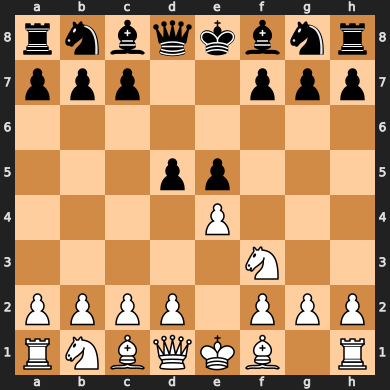

In [21]:
bookmark1 = chess.Board(fenlist[0])
bookmark1

Position after 2...d5

This is the start of the Elephant gambit. Black neglects to defend the pawn on e5 and chooses instead to strike quickly in the center. With some precise moves, white can come out with an advantage after 3. exd5, but Gadimbayli's opponents are often unaware of the best continuation in this obscure opening.

d4 dxe4 4. Nxe5 Bd6 5. Nc3 Bxe5 6. dxe5 Qxd1+ 7. Nxd1 Nc6

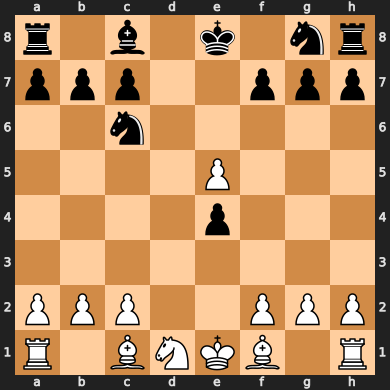

In [22]:
bookmark2 = chess.Board(fenlist[1])
bookmark2

Position after 7...Nc6

This position is reached in several of Gadimbayl's games including the one before you. The queens are traded after the d-file opens, and he is able to quickly reach a comfortable position where he can quickly develop pieces.

Nc3 Nge7 9. Nxe4 Bf5 10. Ng3 Bxc2 11. f4 O-O-O 12. Be2

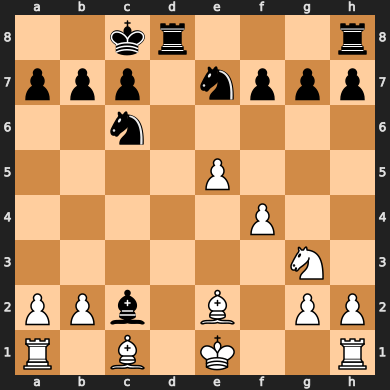

In [23]:
bookmark3 = chess.Board(fenlist[2])
bookmark3

Position after 12. Be2

Black already has a big advantage here. He is ahead in development and has great squares for his minor pieces. The quiet 12...g6 carves out the f5 square and severely impedes white's knight on g3. The opening was a success!

Instead black goes one square too far with 12...g5. Being a blitz game, the game continued. Eventually, Gadimbayli lands a pretty checkmate.

12...g5 13. O-O Kb8 14.fxg5 Nxe5 15. Bf4 N7g6 16. Rac1 Nxf4 17. Rxf4 Bg6 18. Rf2 Rd2 19. Bf1 Rhd8 20.Re1 Rxf2 21. Kxf2 Rd5 22. h4 a6 23. h5 Bc2 24. Ke3 f6 25. gxf6 Ng4+ 26. Kf4 Nxf6 27. Be2 Ra5 28. a3 Nd5+ 29. Kg5 Ne3+ 30. Kh6 Nxg2 31. Rc1 Ne3 32. Bf3 Rb5 33.Re1 Re5 34. Be4 Ng4+ 35. Kg7 Bxe4 36. Rxe4 Rg5+ 37. Kh8 Nf6 38. Rf4 Rg8#

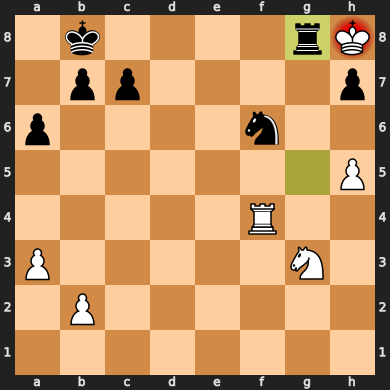

In [24]:
board